# *Introducción a Pandas en los cuadernos de Jupyter*
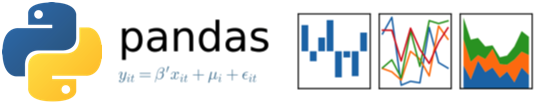

### La estructura de Datos `Serie`

`Arreglo` unidimensional con etiquetas en los ejes (incluidas series de tiempo). Los parámetros de una `Serie` son: `data` (matriz, diccionario o escalar), `index` (arreglo de índices), `dtype` (`numpy.dtype` o `None`) y `copy` (booleano o por defecto `False`)

<br>
Importamos la biblioteca `Pandas`

In [1]:
import pandas as pd
pd.Series?

<br>
Podemos convertir una `lista` en una `serie` y pandas asigna de manera inmediata una lista de índices que empieza en 0.

In [2]:
animales = ['Tigre', 'Oso', 'Camello']
pd.Series(animales)

0      Tigre
1        Oso
2    Camello
dtype: object

In [3]:
numeros = [1, 2, 3]
pd.Series(numeros)

0    1
1    2
2    3
dtype: int64

In [4]:
animales = ['Tigre', 'Oso', None]
pd.Series(animales)

0    Tigre
1      Oso
2     None
dtype: object

<br>
Es importante saber como `NumPy` y `Pandas` manejan los datos faltantes. En Python tenemos el tipo `None` para indicar un dato faltante. Si tenemos una lista de números, `Pandas` automáticamente convierte este valor `None` en un valor designado como `NaN`, que significa `Not a Number`.

In [5]:
numeros = [1, 2, None]
pd.Series(numeros)

0    1.0
1    2.0
2    NaN
dtype: float64

<br>
Importamos la biblioteca `NumPy`. También es importante saber que `NaN` no es `None`. Cuando hacemos un test para saber si `NaN` es `NaN` tambien obtendremos `False`.

In [6]:
import numpy as np
np.nan == None

False

In [7]:
np.nan == np.nan

False

<br>
Se necesita la función especial `isnan` de `NumPy` para chequear la presencia de un `no número` en nuestros datos.

In [8]:
print(np.isnan(np.nan))
print(None is None)
print(np.nan is np.nan)

True
True
True


<br>
¿Cómo creamos una `serie` en `Pandas`? Podemos utilizar una estructura de datos `diccionario` con sus `claves` y convertirlo en una `serie`, donde los índices de la `serie` son las claves del diccionario.

In [9]:
deportes = {'Capoeira': 'Brasil',
          'Rayuela': 'Chile',
          'Pelota Vasca': 'País Vasco',
          'Béisbol': 'Cuba',
           'Rugby': 'Gales',
           'Golf': 'Escocia',
           'Corrida de Toros': 'España',
           'Sumo': 'Japón'}
s = pd.Series(deportes)
s

Béisbol                   Cuba
Capoeira                Brasil
Corrida de Toros        España
Golf                   Escocia
Pelota Vasca        País Vasco
Rayuela                  Chile
Rugby                    Gales
Sumo                     Japón
dtype: object

<br>
Luego, podemos chequear la lista de índices con el atributo `.index`

In [10]:
s.index

Index(['Béisbol', 'Capoeira', 'Corrida de Toros', 'Golf', 'Pelota Vasca',
       'Rayuela', 'Rugby', 'Sumo'],
      dtype='object')

<br>
En este otro ejemplo, pasamos directamente una lista con su conjunto de índices para crear la `Serie`.

In [11]:
s = pd.Series(['Tigre', 'Oso', 'Camello'], index=['India', 'America', 'Africa'])
s

India        Tigre
America        Oso
Africa     Camello
dtype: object

<br>
Aquí tenemos un ejemplo de un elemento nuevo en la lista de índices que no tiene un valor asignado, no existe un país asociado al índice `Natación` y `Pandas` representa este valor faltante con `NaN`. 

In [12]:
deportes = {'Capoeira': 'Brasil',
          'Rayuela': 'Chile',
          'Pelota Vasca': 'País Vasco',
          'Béisbol': 'Cuba',
           'Rugby': 'Gales',
           'Golf': 'Escocia',
           'Corrida de Toros': 'España',
           'Sumo': 'Japón'}
s = pd.Series(deportes, index=['Capoeira', 'Sumo', 'Pelota Vasca',  'Natación'])
s

Capoeira            Brasil
Sumo                 Japón
Pelota Vasca    País Vasco
Natación               NaN
dtype: object

### Búsqueda en una `Serie`

In [13]:
deportes = {'Capoeira': 'Brasil',
          'Rayuela': 'Chile',
          'Pelota Vasca': 'País Vasco',
          'Béisbol': 'Cuba',
           'Rugby': 'Gales',
           'Golf': 'Escocia',
           'Corrida de Toros': 'España',
           'Sumo': 'Japón'}
s = pd.Series(deportes)
s

Béisbol                   Cuba
Capoeira                Brasil
Corrida de Toros        España
Golf                   Escocia
Pelota Vasca        País Vasco
Rayuela                  Chile
Rugby                    Gales
Sumo                     Japón
dtype: object

<br>
Podemos hacer búsquedas en las `series` por posición de índices o por etiqueta de índices. Si queremos hacer búsqueda por ubicación numérica (empezando desde 0) utilizamos el atributo `iloc`. Si por otra parte, hacemos búqueda por etiqueta de índice entonces usamos el atributo `loc`.

In [14]:
s.iloc[4]

'País Vasco'

In [15]:
s.loc['Pelota Vasca']

'País Vasco'

<br>
`Pandas` trata de que el código sea más legible. Si le pasamos por parámetro un valor numérico a la `Serie` esta se comportará como si la búsqueda se hace con el atributo `iloc`, si en cambio le pasamos un objeto, hará la búsqueda por etiqueta como con el atributo `loc`.

In [16]:
s[4]

'País Vasco'

In [17]:
s['Pelota Vasca']

'País Vasco'

<br>
¿Qué pasa cuando tenemos una lista de índices que son enteros?

In [18]:
deportes = {99: 'Brasil',
          100: 'Chile',
          101: 'País Vasco',
          102: 'Cuba',
           103: 'Gales',
           104: 'Escocia',
           105: 'España',
           106: 'Japón'}
s = pd.Series(deportes)
s

99         Brasil
100         Chile
101    País Vasco
102          Cuba
103         Gales
104       Escocia
105        España
106         Japón
dtype: object

<br>
Cuando tenemos un caso como este es más seguro utilizar los atributos `iloc` o `loc` según sea el caso. 

In [19]:
s[0] #Esta instrucción no llamará s.iloc[0] como esperaríamos y va a generar un error

KeyError: 0

In [ ]:
s.iloc[0]

In [ ]:
s.loc[99]

<br>
Ya que sabemos hacer búsquedas en las `Series`, ahora vamos a trabajar con los datos (encontrar valores, resumir los datos o transformarlos).

In [20]:
s = pd.Series([105.00, 223.00, 5, 102.00, 27, -126])
s

0    105.0
1    223.0
2      5.0
3    102.0
4     27.0
5   -126.0
dtype: float64

<br>
Una forma de trabajar es iterar sobre un conjunto de datos e invocar una operación de interés

In [21]:
total = 0
for elemento in s:
    total+=elemento
print(total)

336.0


<br>
Con `NumPy` podemos tener acceso a las funciones universales binarias o unarias (vectorizadas, cálculos más rápidos). En este ejemplo, `np.sum` hará la suma de todos los elementos en la `serie`.

In [22]:
import numpy as np

total = np.sum(s)
print(total)

336.0


<br>
También podemos generar una `serie` grande de números aleatorios y con el método `.head()` podemos desplegar un encabezado con los 5 primeros elementos de la `serie` y con `len` chequear el tamaño de la misma.

In [23]:
s = pd.Series(np.random.randint(0,1000,10000))
print(s.head())
print(len(s))

0     42
1    872
2    956
3    330
4      9
dtype: int64
10000


<br>
Los cuadernos de `Jupyter` tienen **funciones mágicas** que pueden ser útiles. Una de ellas es `%%timeit` que nos servirá para ver cuál de los dos métodos para sumar elementos de una `serie` es más rápido.
Basta con tipear el símbolo `%` y la tecla `Tab` para obtener una lista de las **funciones mágicas** de `Jupyter`.

In [24]:
%%timeit -n 100
sumar = 0
for elemento in s:
    sumar+=elemento

803 µs ± 52.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%%timeit -n 100
sumar = np.sum(s)

128 µs ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<br>
`NumPy` y `Pandas` tienen el `broadcasting`, se puede aplicar una operación a cada valor de la `serie` y modificarla.

In [26]:
s+=2 #Suma 2 a cada elemento de la serie usando broadcasting
s.head()

0     44
1    874
2    958
3    332
4     11
dtype: int64

<br>
Una manera poco eficiente de hacer esto es iterar sobre cada elemento de la `serie` para hacer la suma. El método `.iteritems()` devuelve un iterador sobre los pares `(key, value)` (clave, valor) de un diccionario, en este caso de nuestra `serie` s.

In [27]:
for etiqueta, valor in s.iteritems():
    s.set_value(etiqueta, valor+2)
s.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


0     46
1    876
2    960
3    334
4     13
dtype: int64

In [ ]:
%%timeit -n 10
s = pd.Series(np.random.randint(0,1000,10000))
for etiqueta, valor in s.iteritems():
    s.loc[etiqueta]= valor+2

In [ ]:
%%timeit -n 10
s = pd.Series(np.random.randint(0,1000,10000))
s+=2


<br>
Podemos agregar elementos a una `serie` de la siguiente forma:

In [2]:
import pandas as pd
s = pd.Series([1, 2, 3])
s.loc['Animal'] = 'Oso'
s

0           1
1           2
2           3
Animal    Oso
dtype: object

<br>
Este es un ejemplo de una `serie` donde los valores del conjunto de índices no son únicos. Esto hace que las tablas de datos funcionen diferente y es por ello que agregar nuevos elementos debe hacerse con el método `append`, que en primera instancia, no modificará la `serie` sino que devuelve una nueva `serie` con los elementos que se agregaron.

In [4]:
deportes_originales = pd.Series({'Capoeira': 'Brasil',
          'Rayuela': 'Chile',
          'Pelota Vasca': 'País Vasco',
          'Béisbol': 'Cuba',
           'Rugby': 'Gales',
           'Golf': 'Escocia',
           'Corrida de Toros': 'España',
           'Sumo': 'Japón'})
paises_que_aman_el_beisbol = pd.Series(['Venezuela',
                                      'USA',
                                      'Cuba',
                                      'Puerto Rico',
                                       'Dominicana'], 
                                   index=['Béisbol',
                                          'Béisbol',
                                          'Béisbol',
                                          'Béisbol',
                                          'Béisbol'])
todos_los_paises = deportes_originales.append(paises_que_aman_el_beisbol)

In [5]:
deportes_originales

Béisbol                   Cuba
Capoeira                Brasil
Corrida de Toros        España
Golf                   Escocia
Pelota Vasca        País Vasco
Rayuela                  Chile
Rugby                    Gales
Sumo                     Japón
dtype: object

In [6]:
paises_que_aman_el_beisbol

Béisbol      Venezuela
Béisbol            USA
Béisbol           Cuba
Béisbol    Puerto Rico
Béisbol     Dominicana
dtype: object

In [7]:
todos_los_paises

Béisbol                    Cuba
Capoeira                 Brasil
Corrida de Toros         España
Golf                    Escocia
Pelota Vasca         País Vasco
Rayuela                   Chile
Rugby                     Gales
Sumo                      Japón
Béisbol               Venezuela
Béisbol                     USA
Béisbol                    Cuba
Béisbol             Puerto Rico
Béisbol              Dominicana
dtype: object

In [8]:
todos_los_paises.loc['Béisbol']

Béisbol           Cuba
Béisbol      Venezuela
Béisbol            USA
Béisbol           Cuba
Béisbol    Puerto Rico
Béisbol     Dominicana
dtype: object

### La estructura de datos `DataFrame`

<br>
El `DataFrame` o Tabla de Datos es el corazón de la biblioteca `Pandas`. Es el objeto primario para el análisis de datos. Es una especie de **arreglo bidimensional** con etiquetas en los ejes. En este ejemplo, crearemos tres diccionarios que serán luego las filas de nuestro `DataFrame`.

In [9]:
import pandas as pd
compra_1 = pd.Series({'Nombre': 'Adelis',
                        'Artículo comprado': 'Libro',
                        'Costo': 1200})
compra_2 = pd.Series({'Nombre': 'Miguel',
                        'Artículo comprado': 'Raspberry pi 3',
                        'Costo': 15000})
compra_3 = pd.Series({'Nombre': 'Jaime',
                        'Artículo comprado': 'Balón',
                        'Costo': 5000})
df = pd.DataFrame([compra_1, compra_2, compra_3], index=['Tienda 1', 'Tienda 1', 'Tienda 2'])
df.head()

,Artículo comprado,Costo,Nombre
Tienda 1,Libro,1200,Adelis
Tienda 1,Raspberry pi 3,15000,Miguel
Tienda 2,Balón,5000,Jaime


<br>
En un `DataFrame` también se puede extraer información usando los atributos `loc` y `iloc`.

In [10]:
df.loc['Tienda 2']

Artículo comprado    Balón
Costo                 5000
Nombre               Jaime
Name: Tienda 2, dtype: object

<br>
También podemos chequear el tipo de dato usando la función `type` de Python.

In [11]:
type(df.loc['Tienda 2'])

pandas.core.series.Series

<br>
En los `DataFrame` también se pueden tener listas de índices no únicos. En el ejemplo, hay dos índices con el mismo nombre `Tienda 1`.

In [12]:
df.loc['Tienda 1']

,Artículo comprado,Costo,Nombre
Tienda 1,Libro,1200,Adelis
Tienda 1,Raspberry pi 3,15000,Miguel


<br>
También podemos seleccionar columnas agregando un parámetro extra al atributo `loc`.

In [13]:
df.loc['Tienda 1', 'Costo']

Tienda 1     1200
Tienda 1    15000
Name: Costo, dtype: int64

<br>
Usar el atributo `.T` para obtener la transpuesta del `DataFrame` o Tabla de Datos.

In [14]:
df.T

,Tienda 1,Tienda 1,Tienda 2
Artículo comprado,Libro,Raspberry pi 3,Balón
Costo,1200,15000,5000
Nombre,Adelis,Miguel,Jaime


<br>
Usando `.T.loc[]` se puede seleccionar una columna usando como parámetro la etiqueta de su nombre. 

In [15]:
df.T.loc['Costo']

Tienda 1     1200
Tienda 1    15000
Tienda 2     5000
Name: Costo, dtype: object

In [17]:
df['Costo']

Tienda 1     1200
Tienda 1    15000
Tienda 2     5000
Name: Costo, dtype: int64

In [18]:
df.loc['Tienda 1']['Costo']

Tienda 1     1200
Tienda 1    15000
Name: Costo, dtype: int64

<br>
`loc` también tiene soporte para rebanar o seleccionar del `DataFrame` con la notación `[]`

In [19]:
df.loc[:,['Nombre', 'Costo']]

,Nombre,Costo
Tienda 1,Adelis,1200
Tienda 1,Miguel,15000
Tienda 2,Jaime,5000


<br>
También podemos eliminar datos del `DataFrame` con la función `drop()`. Esta función toma un solo parámetro que es el índice del conjunto de datos que deseamos eliminar. 

In [20]:
df.drop('Tienda 1')

,Artículo comprado,Costo,Nombre
Tienda 2,Balón,5000,Jaime


<br>
Podemos ver que nuestro `DataFrame` original sigue intacto. Solo hicimos una **extracción** de información.

In [21]:
df

,Artículo comprado,Costo,Nombre
Tienda 1,Libro,1200,Adelis
Tienda 1,Raspberry pi 3,15000,Miguel
Tienda 2,Balón,5000,Jaime


<br>
También podemos hacer una copia del `DataFrame` con la función `copy()` para guardar la extracción de información. 

In [24]:
copiar_df = df.copy()
copiar_df = copiar_df.drop('Tienda 1')
copiar_df

,Artículo comprado,Costo,Nombre
Tienda 2,Balón,5000,Jaime


In [26]:
copiar_df.drop?

<br>
Podemos eliminar una columna de manera sencilla, usando simplemente la palabra clave `del` y el índice o nombre de la comuna. 

In [27]:
del copiar_df['Costo']
copiar_df

,Artículo comprado,Nombre
Tienda 2,Balón,Jaime


<br>
Finalmente, es muy sencillo agregar una columna al `DataFrame`.

In [28]:
df['Ubicación'] = ['Venezuela', 'Chile', 'Argentina']
df

,Artículo comprado,Costo,Nombre,Ubicación
Tienda 1,Libro,1200,Adelis,Venezuela
Tienda 1,Raspberry pi 3,15000,Miguel,Chile
Tienda 2,Balón,5000,Jaime,Argentina


### Lectura de un `DataFrame`

<br>
Usemos `!cat` para leer un archivo de formato `CSV`. Nota: `!cat` funciona para **Linux** y **Mac** pero puede no funcionar para **Windows** :(

In [2]:
!cat olympics.csv

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
Austria (AUT),26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
Azerbaijan (AZE),5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
Bahamas (BAH),15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
Bahrain (BRN),8,0,0,1,1,0,0,0,0,0,8,0,0,1,1
Barbados (BAR) [BAR],11,0,0,1,1,0,0,0,0,0,11,0,0,1,1
Belarus (BLR),5,12,24,39,75,6,6,4,5,15,11,18,28,44,90
Belgium (BEL),25,37,52,53,142,20,1,1,3,5,45,38,53,56,147
Bermuda (BER),17,0,0,1,1,7,0,0,0,0,24,0,0,1,1
Bohemia (BOH) [BOH] [Z],3,0,1,3,4,0,0,0,0,0,3,0,1,3,4
Botswana (BOT),9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
Brazil (BRA),

hola


<br>
Pero ... no hay que preocuparse mucho por eso! Podemos leer este archivo en formato `CSV` en un `DataFrame` usando la función `read_csv`. 

In [5]:
import pandas as pd
df = pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


<br>
Aquí podemos ignorar la primera fila del `DataFrame` para dejar más limpia la tabla de información no relevante.

In [6]:
df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


<br>
El atributo `.columns` nos permite ver el nombre de las comlumnas del `DataFrame` y el atributo `.rename` modificar el nombre.

In [7]:
df.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [8]:
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#' + col[1:]}, inplace=True) 

df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### Haciendo búsquedas en un `DataFrame`

<br>
Podemos buscar en el `DataFrame` con una **máscara Booleana** qué países tienen (`True`) o no (`False`) una medalla de oro.

In [9]:
df['Gold'] > 0

Afghanistan (AFG)                               False
Algeria (ALG)                                    True
Argentina (ARG)                                  True
Armenia (ARM)                                    True
Australasia (ANZ) [ANZ]                          True
Australia (AUS) [AUS] [Z]                        True
Austria (AUT)                                    True
Azerbaijan (AZE)                                 True
Bahamas (BAH)                                    True
Bahrain (BRN)                                   False
Barbados (BAR) [BAR]                            False
Belarus (BLR)                                    True
Belgium (BEL)                                    True
Bermuda (BER)                                   False
Bohemia (BOH) [BOH] [Z]                         False
Botswana (BOT)                                  False
Brazil (BRA)                                     True
British West Indies (BWI) [BWI]                 False
Bulgaria (BUL) [H]          

<br>
La función `.where()` toma una máscara booleana como condición en el argumento, la aplica al `DataFrame`, y devuelve un `DataFrame` de la misma forma. En nuestro ejemplo, reemplaza con `NaN` los casos `False` y con su valor original, los casos `True`.

In [10]:
only_gold = df.where(df['Gold'] > 0)
only_gold.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Afghanistan (AFG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria (ALG),12.0,5.0,2.0,8.0,15.0,3.0,0.0,0.0,0.0,0.0,15.0,5.0,2.0,8.0,15.0
Argentina (ARG),23.0,18.0,24.0,28.0,70.0,18.0,0.0,0.0,0.0,0.0,41.0,18.0,24.0,28.0,70.0
Armenia (ARM),5.0,1.0,2.0,9.0,12.0,6.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,9.0,12.0
Australasia (ANZ) [ANZ],2.0,3.0,4.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,12.0


<br>
Podemos contar cuántas países hay medallas de oro hay en total con `count()`

In [11]:
only_gold['Gold'].count()

100

Si contamos sobre los datos originales, veremos que hay 147 países. Cuenta los países para los cuales la máscara Booleana dio `False` >.<

In [12]:
df['Gold'].count()

147

<br>
Podemos establecer otro tipo de condiciones para hacer búsquedas más complejas. Por ejemplo, buscar la cantidad de países que han ganado medalla de oro alguna vez.

In [15]:
len(df[(df['Gold'] > 0) | (df['Gold.1'] > 0)])

101

<br>
Buscar qué países han ganado sólo medallas de oro en Invierno y nunca en Verano.

In [16]:
df[(df['Gold.1'] > 0) & (df['Gold'] == 0)]

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9
